In [1]:
# To make data visualisations display in Jupyter Notebooks 

import pandas as pd # Data processing, Input & Output load,here instead of pd we could have used anything like a,k but pd is easy 2 remember
import numpy as np # linear algebra
import seaborn as sns# Visualization & plotting
import matplotlib.pyplot as plt #for plottng
%matplotlib inline
import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

In [3]:
dataset.head()  #we have 1 ind. variable & 1 dependent variable in a simple linear regression

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:xlabel='YearsExperience'>

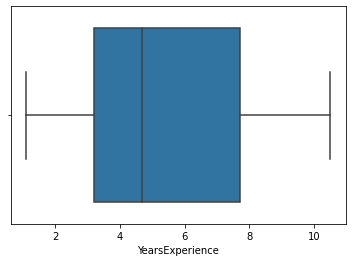

In [5]:
sns.boxplot(dataset['YearsExperience'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

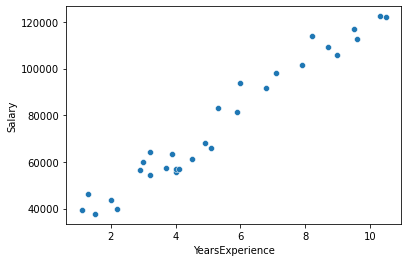

In [6]:
sns.scatterplot(x='YearsExperience',y='Salary',data=dataset)

In [7]:
#^ we have used scatterplot to see relationship(b/w 2 cont. variables) exists or not,it is showing +ve 
# relationship(near linear we can say).

In [8]:
#Correlation tells strength of relationship
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
#^It is a strong correlation,values close to 1&-1 tells the relationship is strong whereas the values close to 0 tells
#the relationship is weak or there is no correlation

# Regression Plot

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

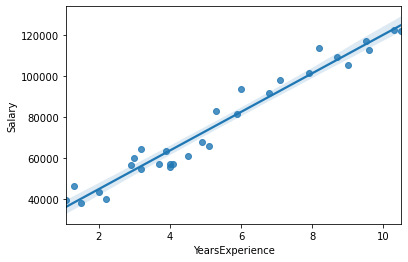

In [10]:
sns.regplot(x='YearsExperience',y='Salary',data=dataset)

In [11]:
#^o/p= straight line pr jo values aa rhi h wo predicted values of Y h

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

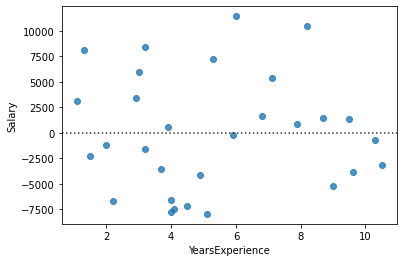

In [12]:
sns.residplot(x='YearsExperience',y='Salary',data=dataset)

In [13]:
#^ The points  reflecting just  above 0 are those actual values which have slightly higher values than the predicted values
# the highest gap is between values 2500 and 7500 here actual value  have very high value than the predicted value

In [14]:
# With  large amount of data our training data will have some outliers & test data will also have some outlier because the
# machine is going to do it randomly,like when we have small data with 20-30 points then we have higher chances of having 
# error whereas in large dataset the split will be so random that the possiblity of having error will be minimum.

In [15]:
#lets split the data in X & Y
X = dataset[['YearsExperience']]

In [16]:
Y = dataset[['Salary']]

In [17]:
#Similarly we will split the X data into X Train , Xtest & Y data in YTrain,YTest,we need scikitlearn  library

In [18]:
from sklearn.model_selection import train_test_split    #train_test_split will return 4 values

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=2/3,random_state=0)

In [20]:
#O/P=This function will return 4 series of values Xtrain,Xtest,Ytrain,Ytest,basically it is dividing X & Y data into 2-2 parts &
# we are instructing the training data to keep the size 2/3 of the total rows or data like suppose we have X=30 Rows so 
# we will put 20 rows in Training  and rest 10 in Test data and the splitting process will be random.

In [21]:
#^If we don't give random_state=0 then on running the command next time  then the  training data will be 2/3  & test data  will
# will be 1/3 but which  rows will go in  training data & which rows will go in test data that will always keep on changing as 
# it is been selected randomly. random_state=0  means the rows in  training data &  test data will get freeze or fix in that 
#its like we have given a name to taining data & test data '0'.

In [22]:
X_train

,YearsExperience
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5
6,3.0
4,2.2


In [23]:
X_train.head()

,YearsExperience
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=2/3,random_state=0)

In [25]:
X_train

,YearsExperience
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5
6,3.0
4,2.2


In [26]:
X_train.head()

,YearsExperience
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2


In [27]:
#^ we  again ran the  last 3 commands and got the output that's the meaning of freezing,if we had not given random state=0 then 
# we would have got different values.


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()  #class ka instance bana liya Name Model

In [30]:
model.fit(X_train,Y_train)   

LinearRegression()

In [31]:
# Instance is  like saying to the machineto use X_train,Y_train data to build a model to fit a model

In [32]:
#Instance means making a copy of that class with a different name,that class has a function inside by name fit and it got 
#invoked and we fed data in Train(X&Y)& once we give that data inside the fit model then it will build a model,it will
#fit a model between X_train Y_train data points & that model is of linear regression type

In [33]:
model.intercept_     #intercept ki value 1 hi hogi

array([26816.19224403])

In [34]:
model.coef_          #o/p=coeff values can be multiple

array([[9345.94244312]])

In [35]:
#Prediction Line is
#Salary = 26816.19224403+9345.94244312*(YrsExp)

In [36]:
Y_pred = model.predict(X_test)

In [37]:
Y_pred

array([[ 40835.10590871],
       [123079.39940819],
       [ 65134.55626083],
       [ 63265.36777221],
       [115602.64545369],
       [108125.8914992 ],
       [116537.23969801],
       [ 64199.96201652],
       [ 76349.68719258],
       [100649.1375447 ]])

In [38]:
Y_test    #actual value of Y

,Salary
2,37731
28,122391
13,57081
10,63218
26,116969
24,109431
27,112635
11,55794
17,83088
22,101302


In [39]:
Y_test-Y_pred

,Salary
2,-3104.105909
28,-688.399408
13,-8053.556261
10,-47.367772
26,1366.354546
24,1305.108501
27,-3902.239698
11,-8405.962017
17,6738.312807
22,652.862455


In [40]:
from sklearn import metrics

In [41]:
r_square = metrics.r2_score(Y_test,Y_pred)

In [42]:
r_square

0.9749154407708353

In [43]:
#O/p= variation in  Y(salary) means we can explain that till 97% through this independent variables(yrs. of exp.)  rest
#3% can be communication skills,language that variables/factors are not in our model.the higher the % better the model is
#HERE 97% DOES NOT REPRESENT THE ACCURACY.